
Analyzing E. coli promoter region: ATGCGTACGTAGCTAGCGATCGATCGTAGCTAGC
Length: 34 nucleotides

 Basic Statistics:
GC Content: 52.9%
Nucleotide composition: A:8, T:8, G:10, C:8

 Repeated Sequences (≥3bp):
1. 'AGC' (length 3) at positions: [31, 14]
2. 'AGC' (length 3) at positions: [14, 27]
3. 'AGCTAGC' (length 7) at positions: [27, 10]
4. 'ATCG' (length 4) at positions: [18, 22]
5. 'CGATCG' (length 6) at positions: [16, 20]

 Burrows-Wheeler Transform: CTTTTTGG$GGTGTAGGCCAATAACCCGCCGGAAA

 Suffix Array Analysis:


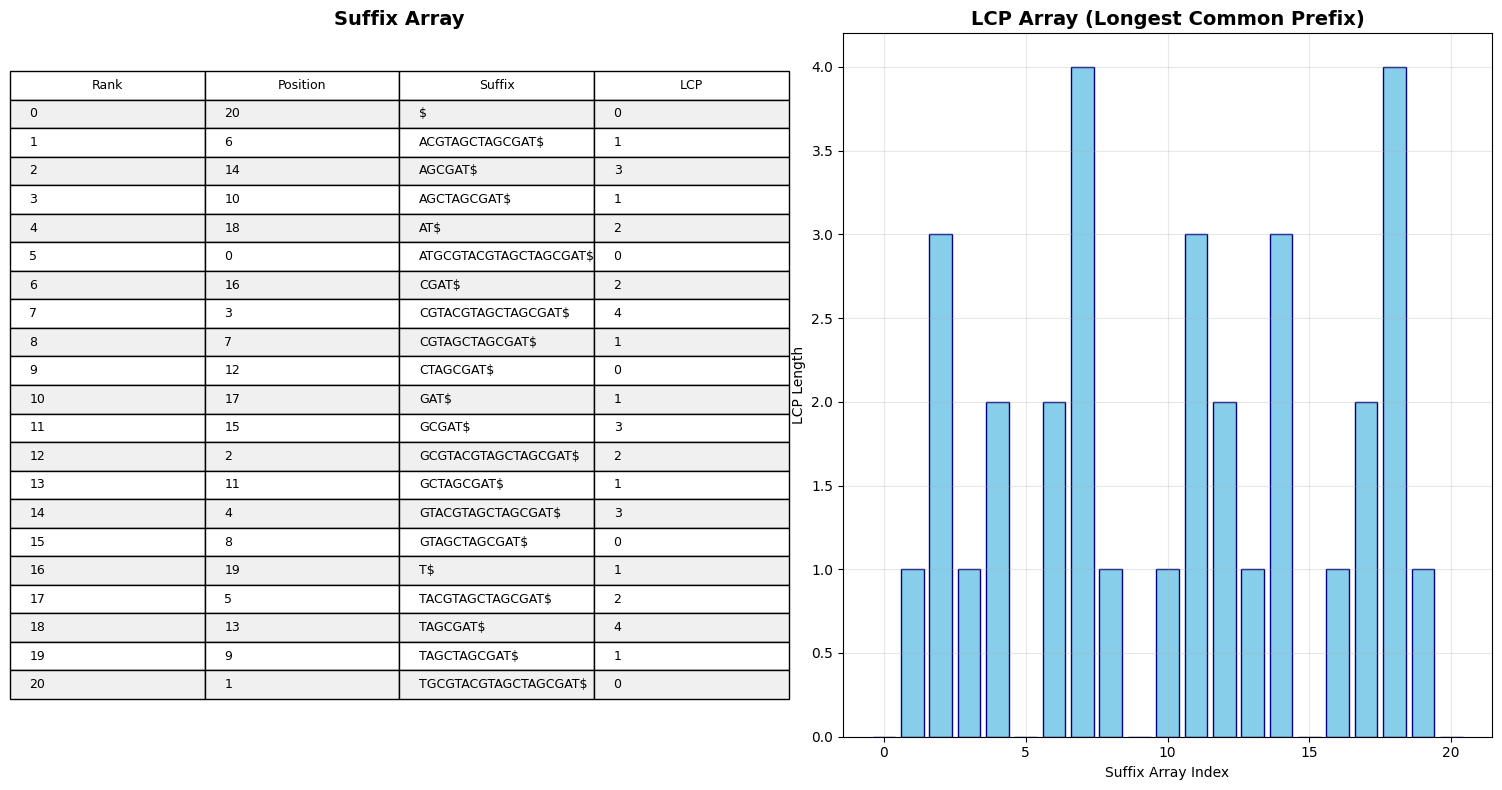


 Suffix Tree Visualization:


/tmp/ipython-input-4006177678.py:294: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


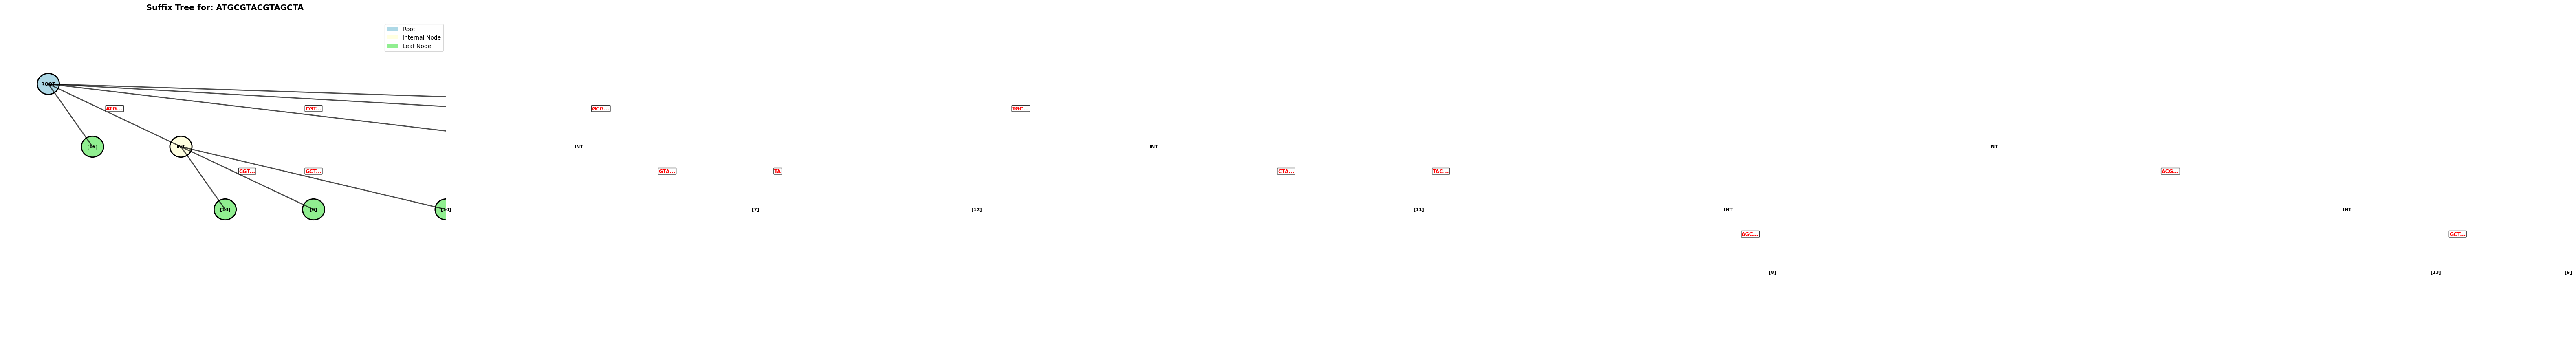


 Pattern Matching Results:
  ATG: Found at positions [0] (Tree: ✓)
  GC: Found at positions [2, 11, 15, 28, 32] (Tree: ✓)
  CG: Found at positions [3, 7, 16, 20, 24] (Tree: ✓)
  GATC: Found at positions [17, 21] (Tree: ✗)

──────────────────────────────────────────────────

Analyzing Human beta-globin fragment: ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCC
Length: 33 nucleotides

 Basic Statistics:
GC Content: 57.6%
Nucleotide composition: A:7, T:7, G:10, C:9

 Repeated Sequences (≥3bp):
1. 'CCTGA' (length 5) at positions: [8, 15]
2. 'CTGA' (length 4) at positions: [9, 16]
3. 'CTG' (length 3) at positions: [16, 28]
4. 'GAG' (length 3) at positions: [21, 18]
5. 'TGA' (length 3) at positions: [10, 17]

 Burrows-Wheeler Transform: CGCGGGA$CGGATACCTATGTTTATAGCGCCGCA

 Suffix Array Analysis:


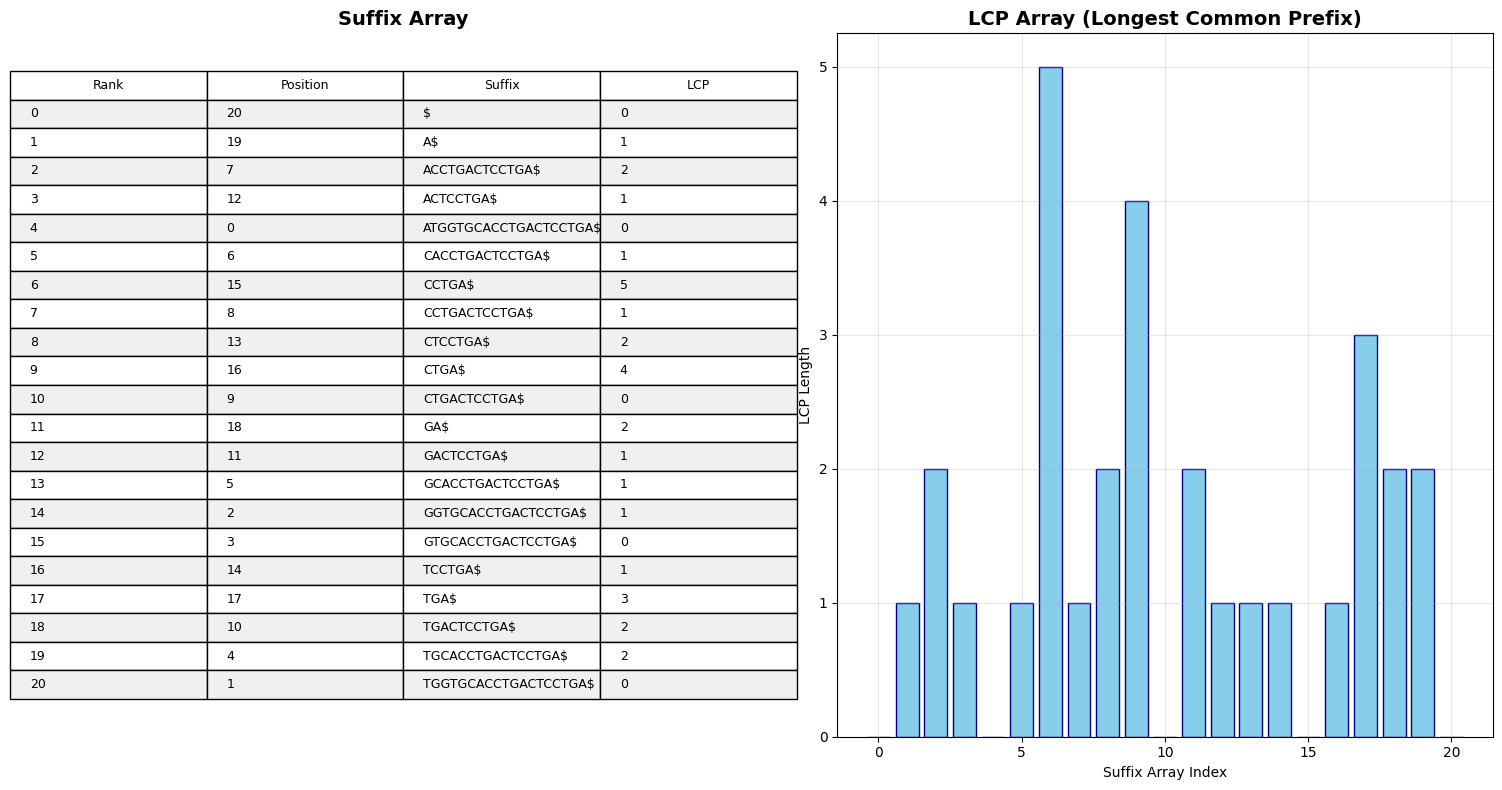


 Suffix Tree Visualization:


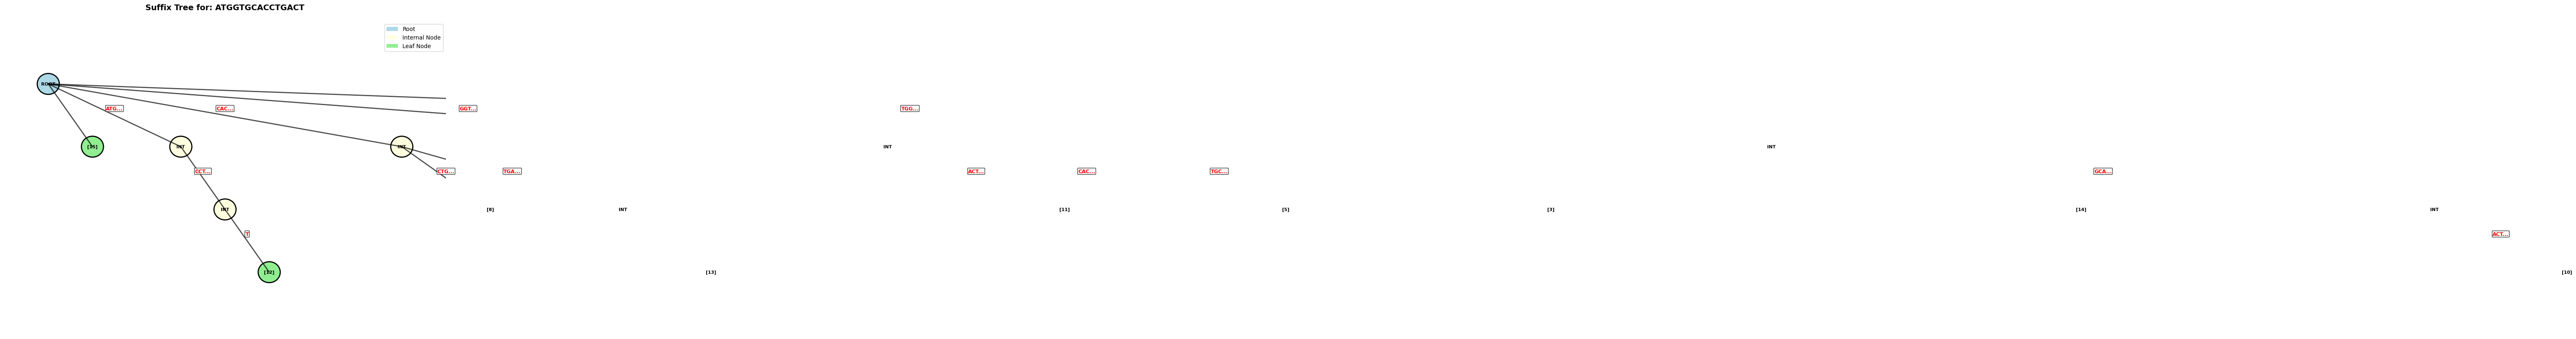


 Pattern Matching Results:
  ATG: Found at positions [0] (Tree: ✓)
  GC: Found at positions [5, 30] (Tree: ✗)

──────────────────────────────────────────────────

Analyzing Repetitive sequence: ATCGATCGATCGCGCGCGCGATCGATCG
Length: 28 nucleotides

 Basic Statistics:
GC Content: 64.3%
Nucleotide composition: A:5, T:5, G:9, C:9

 Repeated Sequences (≥3bp):
1. 'ATCG' (length 4) at positions: [24, 20]
2. 'ATCGATCG' (length 8) at positions: [20, 0]
3. 'ATCGATCG' (length 8) at positions: [0, 4]
4. 'ATCG' (length 4) at positions: [4, 8]
5. 'CGATCG' (length 6) at positions: [22, 18]

 Burrows-Wheeler Transform: GGG$GGTTGTTGGGTCCCCCCCCCAAAAA

 Suffix Array Analysis:


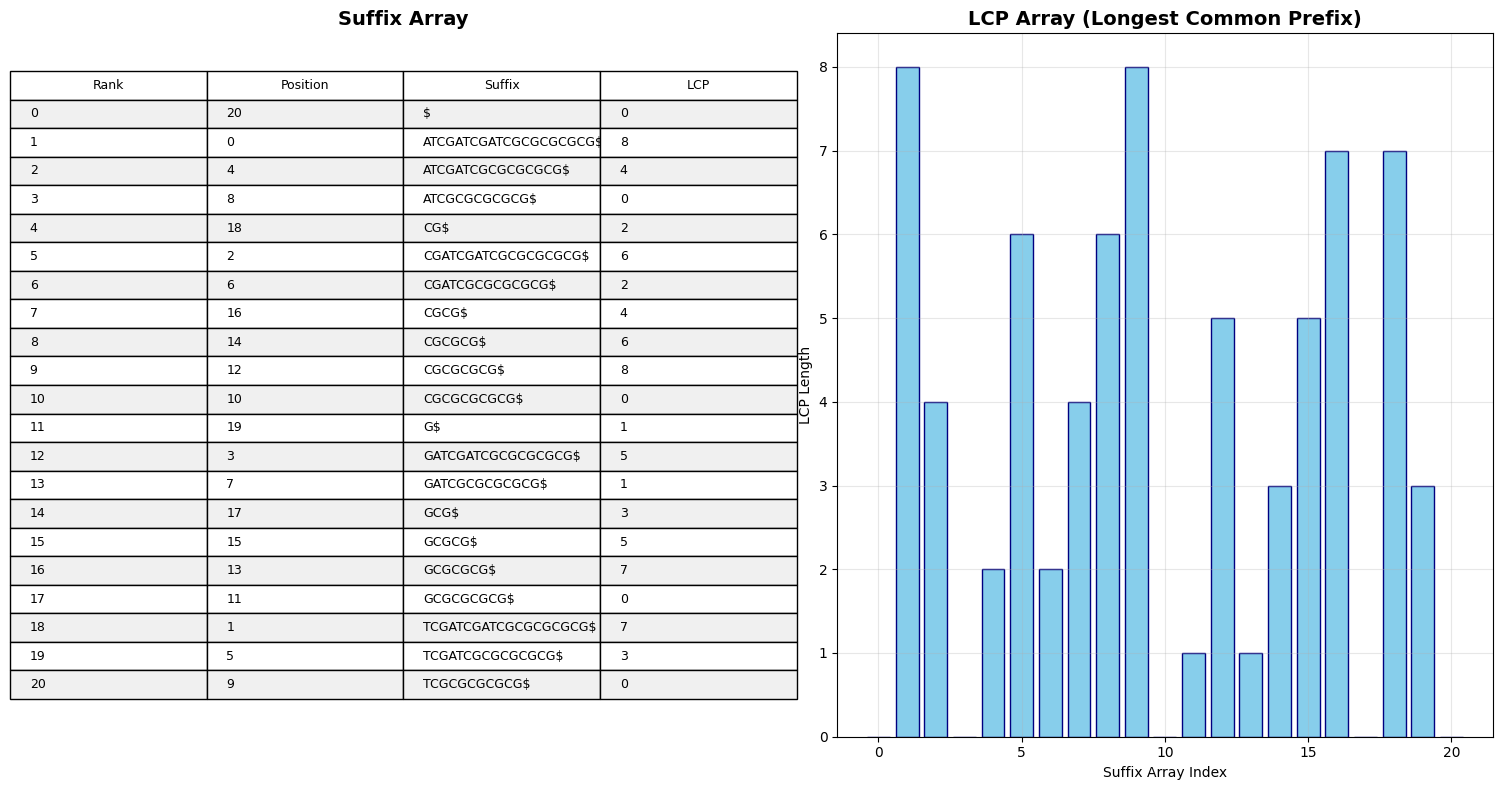


 Suffix Tree Visualization:


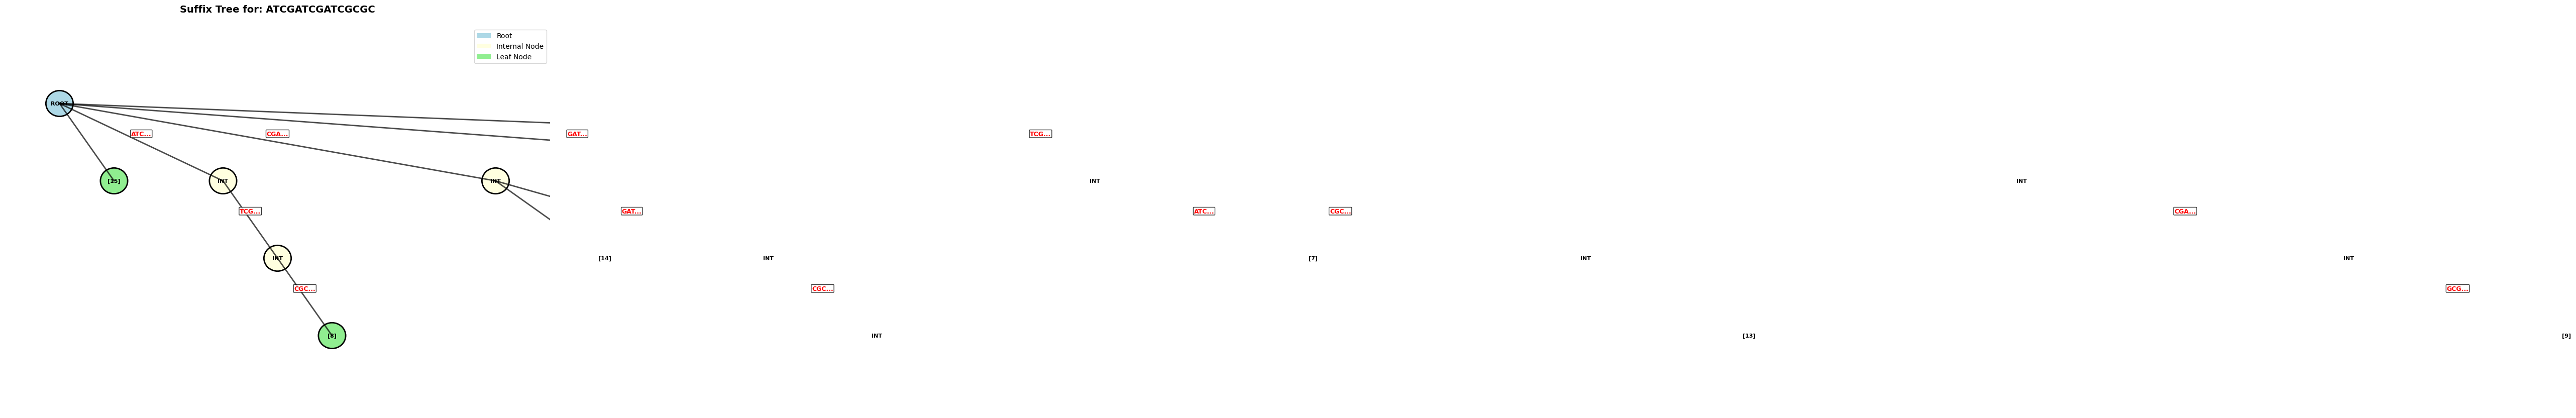


 Pattern Matching Results:
  GC: Found at positions [11, 13, 15, 17] (Tree: ✗)
  CG: Found at positions [2, 6, 10, 12, 14, 16, 18, 22, 26] (Tree: ✓)
  GATC: Found at positions [3, 7, 19, 23] (Tree: ✓)

──────────────────────────────────────────────────

Analyzing Palindromic sequence: ATCGATCGATCGGCTACGATCGATCGAT
Length: 28 nucleotides

 Basic Statistics:
GC Content: 50.0%
Nucleotide composition: A:7, T:7, G:7, C:7

 Repeated Sequences (≥3bp):
1. 'ATCGAT' (length 6) at positions: [22, 18]
2. 'ATCGATCGAT' (length 10) at positions: [18, 0]
3. 'ATCGATCG' (length 8) at positions: [0, 4]
4. 'ATCG' (length 4) at positions: [4, 8]
5. 'CGAT' (length 4) at positions: [24, 20]

 Burrows-Wheeler Transform: TTGGG$GGTTATTTGCCCCCGCACAAAAA

 Suffix Array Analysis:


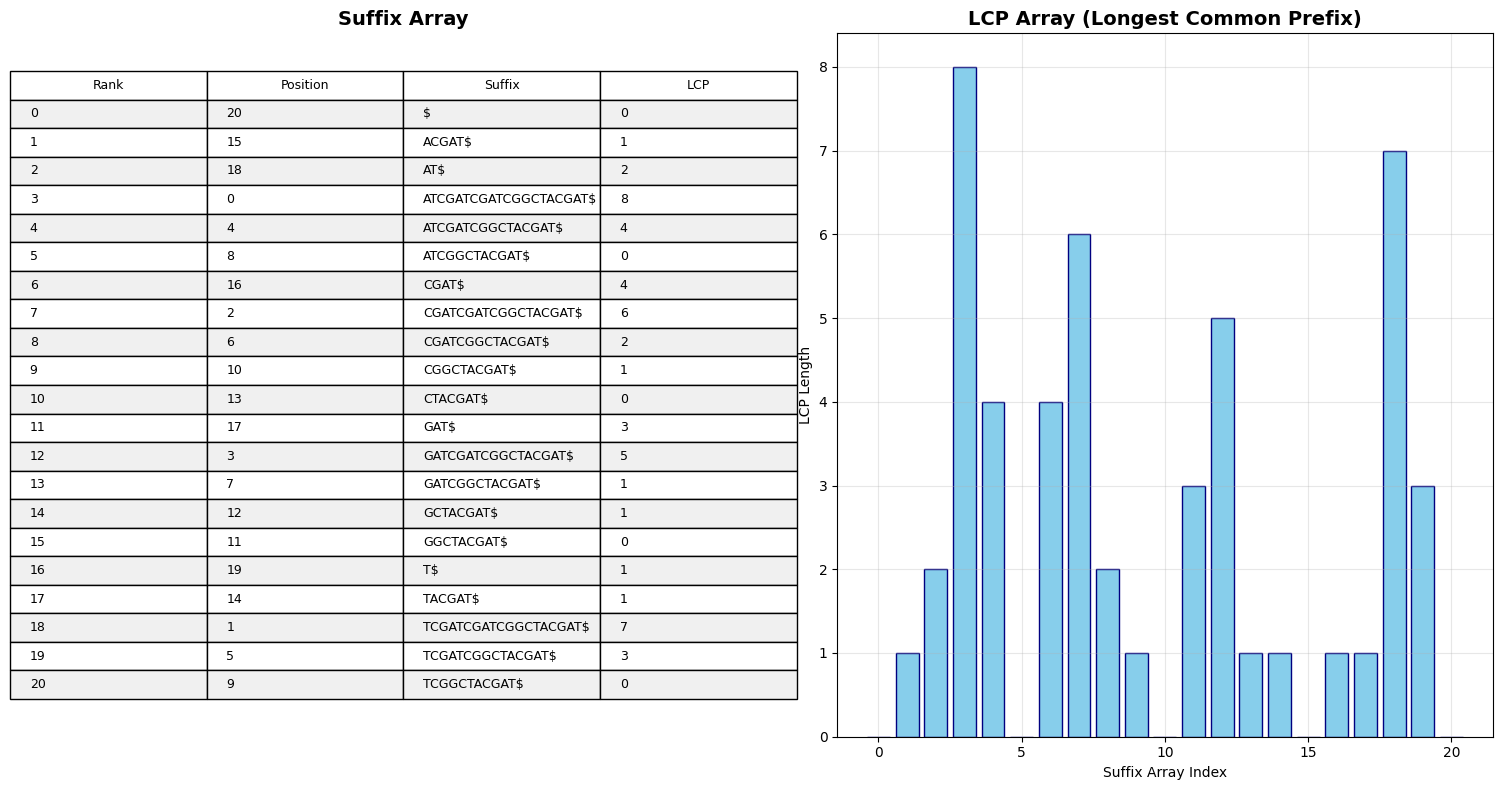


 Suffix Tree Visualization:


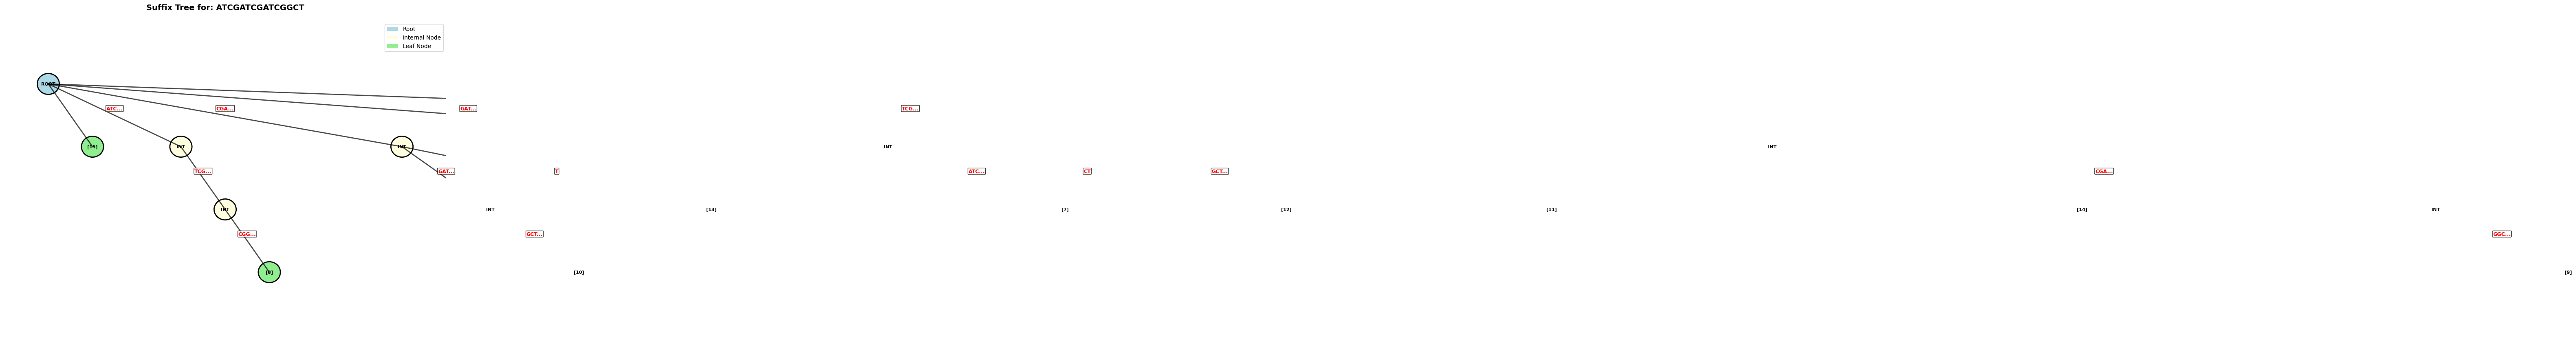


 Pattern Matching Results:
  GC: Found at positions [12] (Tree: ✗)
  CG: Found at positions [2, 6, 10, 16, 20, 24] (Tree: ✓)
  GATC: Found at positions [3, 7, 17, 21] (Tree: ✓)

──────────────────────────────────────────────────


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np
from collections import defaultdict, deque
import pandas as pd

class SuffixArray:
    def __init__(self, sequence):
        self.sequence = sequence + '$'
        self.n = len(self.sequence)
        self.suffix_array = self._build_suffix_array()
        self.lcp_array = self._build_lcp_array()
        self.bwt = self._build_bwt()

    def _build_suffix_array(self):
        suffixes = [(self.sequence[i:], i) for i in range(self.n)]
        suffixes.sort()
        return [suffix[1] for suffix in suffixes]

    def _build_lcp_array(self):
        lcp = [0] * self.n
        rank = [0] * self.n

        for i in range(self.n):
            rank[self.suffix_array[i]] = i

        k = 0
        for i in range(self.n):
            if rank[i] == self.n - 1:
                k = 0
                continue

            j = self.suffix_array[rank[i] + 1]
            while (i + k < self.n and j + k < self.n and
                   self.sequence[i + k] == self.sequence[j + k]):
                k += 1

            lcp[rank[i]] = k
            if k > 0:
                k -= 1

        return lcp

    def _build_bwt(self):
        bwt = []
        for i in self.suffix_array:
            bwt.append(self.sequence[i - 1] if i > 0 else self.sequence[-1])
        return ''.join(bwt)

    def find_repeats(self, min_length=3):
        repeats = []
        for i in range(len(self.lcp_array)):
            if self.lcp_array[i] >= min_length:
                pos1 = self.suffix_array[i]
                pos2 = self.suffix_array[i + 1]
                repeat = self.sequence[pos1:pos1 + self.lcp_array[i]]
                repeats.append((repeat, [pos1, pos2], self.lcp_array[i]))
        return repeats

    def search_pattern(self, pattern):
        def binary_search(pattern, left_bound=True):
            left, right = 0, self.n - 1
            result = -1

            while left <= right:
                mid = (left + right) // 2
                suffix = self.sequence[self.suffix_array[mid]:]

                if suffix.startswith(pattern):
                    result = mid
                    if left_bound:
                        right = mid - 1
                    else:
                        left = mid + 1
                elif suffix < pattern:
                    left = mid + 1
                else:
                    right = mid - 1

            return result

        left_bound = binary_search(pattern, True)
        if left_bound == -1:
            return []

        right_bound = binary_search(pattern, False)
        positions = []
        for i in range(left_bound, right_bound + 1):
            positions.append(self.suffix_array[i])

        return sorted(positions)


class SuffixTreeNode:
    def __init__(self):
        self.children = {}
        self.start = -1
        self.end = None
        self.suffix_index = -1
        self.suffix_link = None


class SuffixTree:
    def __init__(self, sequence):
        self.sequence = sequence + '$'
        self.n = len(self.sequence)
        self.root = SuffixTreeNode()
        self.nodes = [self.root]
        self._build_simple_tree()

    def _build_simple_tree(self):
        for i in range(self.n):
            self._add_suffix(i)

    def _add_suffix(self, suffix_start):
        current = self.root
        for j in range(suffix_start, self.n):
            char = self.sequence[j]

            if char not in current.children:
                new_node = SuffixTreeNode()
                new_node.start = j
                new_node.end = self.n - 1
                new_node.suffix_index = suffix_start
                current.children[char] = new_node
                self.nodes.append(new_node)
                break
            else:
                current = current.children[char]

    def find_longest_common_substrings(self, min_length=3):
        results = []

        def dfs(node, depth):
            if len(node.children) > 1:
                if depth >= min_length:
                    substring = self.sequence[0:depth] if node == self.root else ""
                    if node.start != -1:
                        start_pos = node.start - depth + (node.end - node.start + 1)
                        if start_pos >= 0:
                            substring = self.sequence[start_pos:start_pos + depth]
                            results.append((substring, depth))

            for child in node.children.values():
                edge_length = child.end - child.start + 1 if child.start != -1 else 0
                dfs(child, depth + edge_length)

        dfs(self.root, 0)
        return sorted(results, key=lambda x: x[1], reverse=True)

    def search_pattern(self, pattern):
        current = self.root
        i = 0

        while i < len(pattern):
            char = pattern[i]
            if char not in current.children:
                return False

            child = current.children[char]
            edge_start = child.start
            edge_end = child.end

            j = edge_start
            while j <= edge_end and i < len(pattern):
                if self.sequence[j] != pattern[i]:
                    return False
                j += 1
                i += 1

            if i < len(pattern):
                current = child

        return True


def analyze_dna_sequence(sequence, sequence_name="DNA Sequence"):
    print(f"Analyzing {sequence_name}: {sequence}")
    print(f"Length: {len(sequence)} nucleotides\n")

    sa = SuffixArray(sequence)
    st = SuffixTree(sequence)

    results = {
        'sequence': sequence,
        'length': len(sequence),
        'suffix_array': sa,
        'suffix_tree': st,
        'repeats': sa.find_repeats(),
        'gc_content': (sequence.count('G') + sequence.count('C')) / len(sequence) * 100
    }

    print(" Basic Statistics:")
    print(f"GC Content: {results['gc_content']:.1f}%")
    print(f"Nucleotide composition: A:{sequence.count('A')}, T:{sequence.count('T')}, G:{sequence.count('G')}, C:{sequence.count('C')}")

    print(f"\n Repeated Sequences (≥3bp):")
    for i, (repeat, positions, length) in enumerate(results['repeats'][:5]):
        print(f"{i+1}. '{repeat}' (length {length}) at positions: {positions}")

    print(f"\n Burrows-Wheeler Transform: {sa.bwt}")

    return results


def visualize_suffix_tree(sequence, max_depth=3):
    if len(sequence) > 15:
        sequence = sequence[:15]

    st = SuffixTree(sequence)

    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 15)
    ax.axis('off')

    positions = {}
    level_counts = defaultdict(int)

    def assign_positions(node, level=0, x_offset=0):
        if level > max_depth:
            return x_offset

        level_counts[level] += 1
        node_x = x_offset + level_counts[level] * 2
        node_y = 12 - level * 3
        positions[id(node)] = (node_x, node_y)

        child_x = node_x
        for char, child in sorted(node.children.items()):
            child_x = assign_positions(child, level + 1, child_x)

        return child_x

    assign_positions(st.root)

    def draw_tree(node, level=0):
        if level > max_depth or id(node) not in positions:
            return

        node_pos = positions[id(node)]

        for char, child in node.children.items():
            if id(child) in positions:
                child_pos = positions[id(child)]

                ax.plot([node_pos[0], child_pos[0]], [node_pos[1], child_pos[1]],
                       'k-', linewidth=2, alpha=0.7)

                if child.start != -1:
                    edge_label = sequence[child.start:min(child.start+3, child.end+1)]
                    if child.end - child.start > 2:
                        edge_label += "..."
                else:
                    edge_label = char

                mid_x = (node_pos[0] + child_pos[0]) / 2
                mid_y = (node_pos[1] + child_pos[1]) / 2
                ax.text(mid_x, mid_y + 0.2, edge_label, ha='center', va='bottom',
                       fontsize=9, weight='bold', color='red',
                       bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.8))

                draw_tree(child, level + 1)

    for node_id, (x, y) in positions.items():
        node = next(n for n in st.nodes if id(n) == node_id)

        if node == st.root:
            color = 'lightblue'
            label = 'ROOT'
        elif len(node.children) == 0:
            color = 'lightgreen'
            label = f'[{node.suffix_index}]' if node.suffix_index != -1 else 'LEAF'
        else:
            color = 'lightyellow'
            label = 'INT'

        circle = patches.Circle((x, y), 0.5, facecolor=color, edgecolor='black', linewidth=2)
        ax.add_patch(circle)
        ax.text(x, y, label, ha='center', va='center', fontsize=8, weight='bold')

    draw_tree(st.root)

    ax.set_title(f'Suffix Tree for: {sequence}', fontsize=14, weight='bold', pad=20)

    legend_elements = [
        patches.Circle((0, 0), 0.1, facecolor='lightblue', label='Root'),
        patches.Circle((0, 0), 0.1, facecolor='lightyellow', label='Internal Node'),
        patches.Circle((0, 0), 0.1, facecolor='lightgreen', label='Leaf Node')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()


def create_suffix_array_visualization(sequence):
    if len(sequence) > 20:
        sequence = sequence[:20]

    sa = SuffixArray(sequence)

    data = []
    for i, pos in enumerate(sa.suffix_array):
        suffix = sa.sequence[pos:]
        data.append({
            'Rank': i,
            'Position': pos,
            'Suffix': suffix,
            'LCP': sa.lcp_array[i] if i < len(sa.lcp_array) else 0
        })

    df = pd.DataFrame(data)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

    ax1.axis('tight')
    ax1.axis('off')
    table = ax1.table(cellText=df.values, colLabels=df.columns,
                     cellLoc='left', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)

    for i in range(len(df)):
        if i % 2 == 0:
            for j in range(len(df.columns)):
                table[(i+1, j)].set_facecolor('#f0f0f0')

    ax1.set_title('Suffix Array', fontsize=14, weight='bold')

    lcp_values = [x for x in sa.lcp_array if x > 0]
    if lcp_values:
        ax2.bar(range(len(sa.lcp_array)), sa.lcp_array, color='skyblue', edgecolor='navy')
        ax2.set_xlabel('Suffix Array Index')
        ax2.set_ylabel('LCP Length')
        ax2.set_title('LCP Array (Longest Common Prefix)', fontsize=14, weight='bold')
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No significant\ncommon prefixes found',
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('LCP Array', fontsize=14, weight='bold')

    plt.tight_layout()
    plt.show()

    return df


def main_analysis():

    sequences = {
        "E. coli promoter region": "ATGCGTACGTAGCTAGCGATCGATCGTAGCTAGC",
        "Human beta-globin fragment": "ATGGTGCACCTGACTCCTGAGGAGAAGTCTGCC",
        "Repetitive sequence": "ATCGATCGATCGCGCGCGCGATCGATCG",
        "Palindromic sequence": "ATCGATCGATCGGCTACGATCGATCGAT"
    }

    print("=" * 50)

    for name, seq in sequences.items():
        print(f"\n{'='*50}")
        results = analyze_dna_sequence(seq, name)

        print(f"\n Suffix Array Analysis:")
        create_suffix_array_visualization(seq)

        print(f"\n Suffix Tree Visualization:")
        visualize_suffix_tree(seq)

        patterns = ["ATG", "GC", "CG", "GATC"]
        print(f"\n Pattern Matching Results:")
        for pattern in patterns:
            if pattern in seq:
                positions = results['suffix_array'].search_pattern(pattern)
                st_found = results['suffix_tree'].search_pattern(pattern)
                print(f"  {pattern}: Found at positions {positions} (Tree: {'✓' if st_found else '✗'})")

        print("\n" + "─" * 50)

if __name__ == "__main__":
    main_analysis()
